In [1]:
# (Optional) Are you loading data from within Google Drive?
WITHIN_GDRIVE = False # otherwise: True

In [2]:
# Setup repository and download toy CalMS21 data
if not WITHIN_GDRIVE:
  !git clone https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial.git /content/Neurosymbolic_Tutorial
  %cd /content/Neurosymbolic_Tutorial/code_and_data
  !gdown 1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L && (unzip -o calms21_task1.zip; rm -rf calms21_task1.zip )
else:
  from google.colab import drive
  drive.mount('/content/drive')
  # Change this path to match the corect destination
  %cd /content/drive/MyDrive/Neurosymbolic_Tutorial/code_and_data/
  import os; assert os.path.exists("dsl.py"), f"Couldn't find `dsl.py` at this location {os.getcwd()}. HINT: Are you within `code_and_data`"
  !gdown 1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L && (unzip -o calms21_task1.zip; rm -rf calms21_task1.zip )


import os
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc
import numpy as np

Cloning into '/content/Neurosymbolic_Tutorial'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 132 (delta 68), reused 82 (delta 33), pack-reused 0
Receiving objects: 100% (132/132), 19.30 MiB | 29.58 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/content/Neurosymbolic_Tutorial/code_and_data
Downloading...
From: https://drive.google.com/uc?id=1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L
To: /content/Neurosymbolic_Tutorial/code_and_data/calms21_task1.zip
100% 18.2M/18.2M [00:00<00:00, 168MB/s]
Archive:  calms21_task1.zip
   creating: data/
   creating: data/calms21_task1/
  inflating: data/calms21_task1/test_data.npy  
  inflating: data/calms21_task1/test_investigation_labels.npy  
  inflating: data/calms21_task1/test_mount_labels.npy  
  inflating: data/calms21_task1/test_trajectory_data.npy  
  inflating: data/calms21_task1/train_data.npy  
  inflating: data/calms21_task1/train_investiga

In [3]:
import numpy as np

# Original mouse trajectory data in x,y coordinates
trajectory_data = np.load("data/calms21_task1/train_trajectory_data.npy")
print("Trajectory data: " + str(trajectory_data.shape))

# Processed features from trajectory data, consisting of behavior attributes
# such as speed, facing angle, distance between mice, etc.
feature_data = np.load("data/calms21_task1/train_data.npy")
print("Extracted features: " + str(feature_data.shape))

# Human annotated labels
labels = np.load("data/calms21_task1/train_investigation_labels.npy")
print("Label data: " + str(labels.shape))

Trajectory data: (5000, 13, 2, 2, 7)
Extracted features: (5000, 13, 18)
Label data: (5000, 1)


In [4]:
# Your implementation here.

In [5]:
# Plotting utility functions.

rc('animation', html='jshtml')

#Plotting constants
FRAME_WIDTH_TOP = 1024
FRAME_HEIGHT_TOP = 570

RESIDENT_COLOR = 'lawngreen'
INTRUDER_COLOR = 'skyblue'

PLOT_MOUSE_START_END = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4),
                        (3, 5), (4, 6), (5, 6), (1, 2)]

def set_figax():
    fig = plt.figure(figsize=(6, 4))

    img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))

    ax = fig.add_subplot(111)
    ax.imshow(img)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    return fig, ax

def plot_mouse(ax, pose, color):
    # Draw each keypoint
    for j in range(7):
        ax.plot(pose[j, 0], pose[j, 1], 'o', color=color, markersize=5)

    # Draw a line for each point pair to form the shape of the mouse

    for pair in PLOT_MOUSE_START_END:
        line_to_plot = pose[pair, :]
        ax.plot(line_to_plot[:, 0], line_to_plot[
                :, 1], color=color, linewidth=1)

def animate_pose_sequence(video_name, keypoint_sequence):
    # Returns the animation of the keypoint sequence between start frame
    # and stop frame. Optionally can display annotations.
    seq = keypoint_sequence.transpose((0,1,3,2))

    image_list = []

    counter = 0
    for j in range(keypoint_sequence.shape[0]):
        if counter%20 == 0:
          print("Processing frame ", j)
        fig, ax = set_figax()
        plot_mouse(ax, seq[j, 0, :, :], color=RESIDENT_COLOR)
        plot_mouse(ax, seq[j, 1, :, :], color=INTRUDER_COLOR)

        ax.set_title(
            video_name + '\n frame {:03d}.png'.format(j), fontsize = 14)

        ax.axis('off')
        fig.tight_layout(pad=1)
        ax.margins(0)

        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(),
                                        dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(
            fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image_from_plot)

        plt.close()
        counter = counter + 1

    # Plot animation.
    fig = plt.figure()
    plt.axis('off')
    im = plt.imshow(image_list[0])

    def animate(k):
        im.set_array(image_list[k])
        return im,
    ani = animation.FuncAnimation(fig, animate, frames=len(image_list), blit=True)
    return ani


Processing frame  0


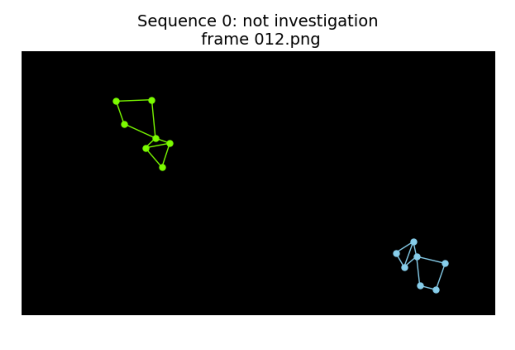

In [6]:
# Plot the first example of class 0 = not investigation

total_samples = labels.shape[0]

for i in range(total_samples):
  if labels[i] == 0:
    ani = animate_pose_sequence('Sequence ' + str(i) + ': not investigation', trajectory_data[i])
    break
ani

Processing frame  0


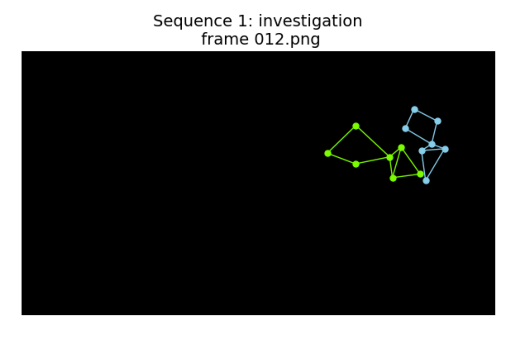

In [7]:
# Plot the first example of class 1 = investigation

for i in range(total_samples):
  if labels[i] == 1:
    ani = animate_pose_sequence('Sequence ' + str(i) + ': investigation', trajectory_data[i])
    break
ani

In [8]:
# Feature value plotting utilities

def set_figax_features():
    fig = plt.figure(figsize=(6,6))

    img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))

    ax = fig.add_subplot(211)
    ax.imshow(img)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2 = fig.add_subplot(212)

    return fig, ax, ax2

def animate_pose_sequence_features(video_name, keypoint_sequence, feature_sequence,
                                   max_y_lim = None, min_y_lim = None):
    # Returns the animation of the keypoint sequence between start frame
    # and stop frame. Optionally can display annotations.
    seq = keypoint_sequence.transpose((0,1,3,2))

    image_list = []

    counter = 0
    for j in range(keypoint_sequence.shape[0]):
        if counter%20 == 0:
          print("Processing frame ", j)
        fig, ax, ax2 = set_figax_features()
        plot_mouse(ax, seq[j, 0, :, :], color=RESIDENT_COLOR)
        plot_mouse(ax, seq[j, 1, :, :], color=INTRUDER_COLOR)

        ax.set_title(
            video_name + '\n frame {:03d}.png'.format(j), fontsize = 14)

        ax.axis('off')
        fig.tight_layout(pad=1)
        ax.margins(0)

        ax2.plot(np.arange(feature_sequence.shape[0]), feature_sequence)
        ax2.set_ylim([min_y_lim, max_y_lim])

        ax2.vlines(x = j, ymin = -100, ymax = 100,
                  colors = 'salmon', linestyles = 'dashed')

        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(),
                                        dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(
            fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image_from_plot)

        plt.close()
        counter = counter + 1

    # Plot animation.
    fig = plt.figure()
    plt.axis('off')
    plt.tight_layout()
    im = plt.imshow(image_list[0])

    def animate(k):
        im.set_array(image_list[k])
        return im,
    ani = animation.FuncAnimation(fig, animate, frames=len(image_list), blit=True)
    return ani

Processing frame  0


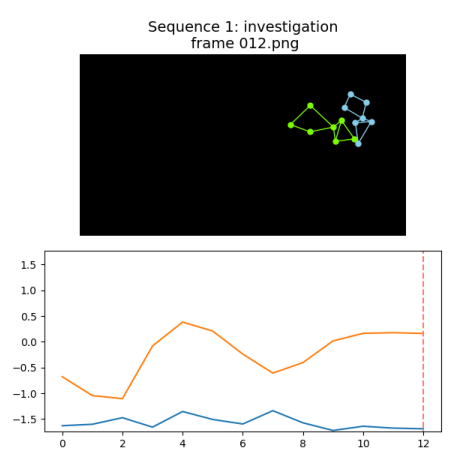

In [9]:
from IPython.display import HTML, Image # For GIF


# Plot the first example of class 1 = investigation with features
# Note that feature values are already normalized
CALMS21_FEATURE_SUBSETS = {
    "res_angle_head_body": np.arange(0, 2),
    "axis_ratio": np.arange(2, 4),
    "speed": np.arange(4, 6),
    "acceleration": np.arange(6, 8),
    "tangential_velocity": np.arange(8, 10),
    "rel_angle_social": np.arange(10, 12),
    "angle_between": np.arange(12, 13),
    "facing_angle": np.arange(13, 15),
    "overlap_bboxes": np.arange(15, 16),
    "area_ellipse_ratio": np.arange(16, 17),
    "min_res_nose_dist": np.arange(17, 18)
}

# Change the feature name in the dictionary here to plot different features.
feature_indices = CALMS21_FEATURE_SUBSETS['rel_angle_social'].squeeze()

# Modify the code below to plot different samples.
for i in range(total_samples):
  if labels[i] == 1:
    ani = animate_pose_sequence_features('Sequence ' + str(i) + ': investigation',
                                         trajectory_data[i],
                                         feature_data[i, :, feature_indices].transpose(),
                                         max_y_lim = np.max(feature_data[:, :, feature_indices]),
                                         min_y_lim = np.min(feature_data[:, :, feature_indices]))
    break

ani

In [10]:
!pip install pytorch-lightning # Pytorch lightning is a wrapper around PyTorch.
import os
import torch, numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from sklearn.metrics import f1_score, precision_score, recall_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 55.0 MB/s eta 0:00:00


In [11]:
# Feel free to play around with these numbers at any time. Here's how to modify the numbers
# config = TrainConfig()
# config.epochs = 100
class TrainConfig:
    epochs: int = 20
    batch_size: int = 32
    lr: float = 3e-3
    weight_decay: float = 0.0
    train_size: int = 2000 # out of 5000
    val_size: int = 1000 # out of 5000
    test_size: int = 3000 # out of 3000
    num_classes: int = 2

config = TrainConfig()

In [12]:
# Dataloader for the CalMS21 dataset
class Calms21Task1Dataset(torch.utils.data.Dataset):
    def __init__(self, data_path, investigations_path, transform=None, target_transform=None):
        self.data = np.load(data_path)
        self.investigations = np.load(investigations_path)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.investigations[idx]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y


class Calms21Task1DataModule(pl.LightningDataModule):
    def __init__(self, data_dir, batch_size, transform=None, target_transform=None ):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.train_data_path = os.path.join(data_dir, "train_data.npy")
        self.train_investigations_path = os.path.join(data_dir, "train_investigation_labels.npy")
        self.test_data_path = os.path.join(data_dir, "test_data.npy")
        self.test_investigations_path = os.path.join(data_dir, "test_investigation_labels.npy")
        self.val_data_path = os.path.join(data_dir, "val_data.npy")
        self.val_investigations_path = os.path.join(data_dir, "val_investigation_labels.npy")
        self.transform = transform
        self.target_transform = target_transform

    def setup(self, stage=None):
        self.train_dataset = Calms21Task1Dataset(self.train_data_path, self.train_investigations_path, self.transform, self.target_transform)
        self.val_dataset = Calms21Task1Dataset(self.val_data_path, self.val_investigations_path, self.transform, self.target_transform)
        self.test_dataset = Calms21Task1Dataset(self.test_data_path, self.test_investigations_path, self.transform, self.target_transform)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False)

dm = Calms21Task1DataModule(data_dir="data/calms21_task1/", batch_size=32, transform=None, target_transform=None)
dm.setup(None)
test_dataloader = dm.test_dataloader()

In [13]:
from collections import OrderedDict
class ConvNet1DBaseline(pl.LightningModule):
    # Convert above keras function to pytorch
    def __init__(self, config : TrainConfig):
        super().__init__()
        self.config = config
        self.channels = (8, 8)
        # input_dim = (batch_size, 18, 13)
        self.model = nn.Sequential(OrderedDict([
            ('block1', self.init_block(18, self.channels[0])),
            ('block2', self.init_block(self.channels[0], self.channels[1])),
            ('flatten', nn.Flatten()),
            ('dense1', nn.Linear(self.channels[0], config.num_classes)),
        ]))

    def init_block(self, input_size, output_size, kernel_size=3) -> nn.Sequential:
        return nn.Sequential(OrderedDict([
            ('conv', nn.Conv1d(input_size, output_size, kernel_size=kernel_size, stride=1, padding=0)),
            ('bn', nn.BatchNorm1d(output_size)),
            ('act', nn.ReLU()),
            ('maxpool', nn.MaxPool1d(2, 2)),
            ('dropout', nn.Dropout(0.5)),
        ]))


    def forward(self, x):
        """
        x : (batch_size, 18, 13)
        output : (batch_size, num_classes)
        """
        output = self.model(x.transpose(-1, -2))
        return output

    def f1_score(self, y_true, y_pred):
        """
        y_true : (batch_size, num_classes)
        y_pred : (batch_size, num_classes)
        """
        y_true = y_true.cpu().numpy()
        y_pred = y_pred.cpu().numpy()
        return f1_score(y_true, y_pred, average="binary")

    def step(self, batch, stage=None):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y.squeeze(1))


        if stage:
            self.log(f"{stage}_loss", loss, prog_bar=True)
            self.log(f"{stage}_acc", torch.eq(y_hat.argmax(-1), y).float().mean())
            self.log(f"{stage}_f1", self.f1_score(y, y_hat.argmax(-1)), prog_bar=True)

        return loss

    def training_step(self, batch, batch_idx):
        nll_loss = self.step(batch, stage=None)
        self.log("train_loss", nll_loss)
        return nll_loss

    def validation_step(self, batch, batch_idx):
        self.step(batch, stage="valid")

    def test_step(self, batch, batch_idx):
        self.step(batch, stage="test")

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(),
            lr=self.config.lr,
            weight_decay=self.config.weight_decay
        )
        return optimizer


model = ConvNet1DBaseline(config=config)

In [15]:
def train(model, datamodule, config):
    trainer = pl.Trainer( max_epochs=config.epochs)
    trainer.fit(model, datamodule)
    return model

trained_model = train(model, dm, config=config)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 690   
-------------------------------------
690       Trainable params
0         Non-trainable params
690       Total params
0.003     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [16]:
# Evaluate using F1 score.
test_trajectory = np.load("data/calms21_task1/test_trajectory_data.npy")
test_labels = np.load("data/calms21_task1/test_investigation_labels.npy")

def evaluate(model, data_loader, gt_labels):
  predictions = []
  for x,_ in data_loader:
    predictions.append(torch.argmax(model(x), dim = -1))

  predictions = torch.cat(predictions, dim = 0)

  f1 = f1_score(test_labels, predictions, average="binary")
  precision = precision_score(test_labels, predictions, average="binary")
  recall = recall_score(test_labels, predictions, average="binary")

  print("F1 score on test set: " + str(f1))
  print("Precision on test set: " + str(precision))
  print("Recall on test set: " + str(recall))

  return predictions, f1, precision, recall


predictions_nn, _, _, _ = evaluate(model, dm.test_dataloader(), test_labels)

F1 score on test set: 0.7241847826086958
Precision on test set: 0.7087765957446809
Recall on test set: 0.7402777777777778


In [17]:
def display_samples_by_class(trajectory_data, class_labels, predicted_classes,
                             num_classes = 2, n_samples = 5):
  seq = trajectory_data.transpose((0,1,2,4,3))

  fig, axs = plt.subplots(n_samples, num_classes*2,
                          figsize = (n_samples*6, num_classes*2*6))

  img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))

  for c in range(num_classes):
    for predicted in range(num_classes):
      # This only works for 2 classes
      plot_id = c*2 + abs(predicted - c)
      if predicted == c:
        axs[0][plot_id].set_title('Class ' + str(c) +
                            '- Predicted ' + str(predicted), color = 'green', fontsize = 28)
      else:
        axs[0][plot_id].set_title('Class ' + str(c) +
                            '- Predicted ' + str(predicted), color = 'red', fontsize = 28)

      gt = np.argwhere(class_labels.squeeze() == c).squeeze()
      pred = np.argwhere(predicted_classes.squeeze() == predicted).squeeze()

      random_indices = np.random.choice(np.intersect1d(gt, pred),
                                        size=n_samples, replace=False)

      for i in range(random_indices.shape[0]):

        axs[i][plot_id].imshow(img)

        plot_mouse(axs[i][plot_id], seq[random_indices[i], 6, 0, :, :], color=RESIDENT_COLOR)
        plot_mouse(axs[i][plot_id], seq[random_indices[i], 6, 1, :, :], color=INTRUDER_COLOR)

        axs[i][plot_id].text(50, 100, 'Test ID: ' + str(random_indices[i]), fontsize=28, color='C1')

        axs[i][plot_id].axis('off')
        fig.tight_layout(pad=1)
        axs[i][plot_id].margins(0)

  return fig

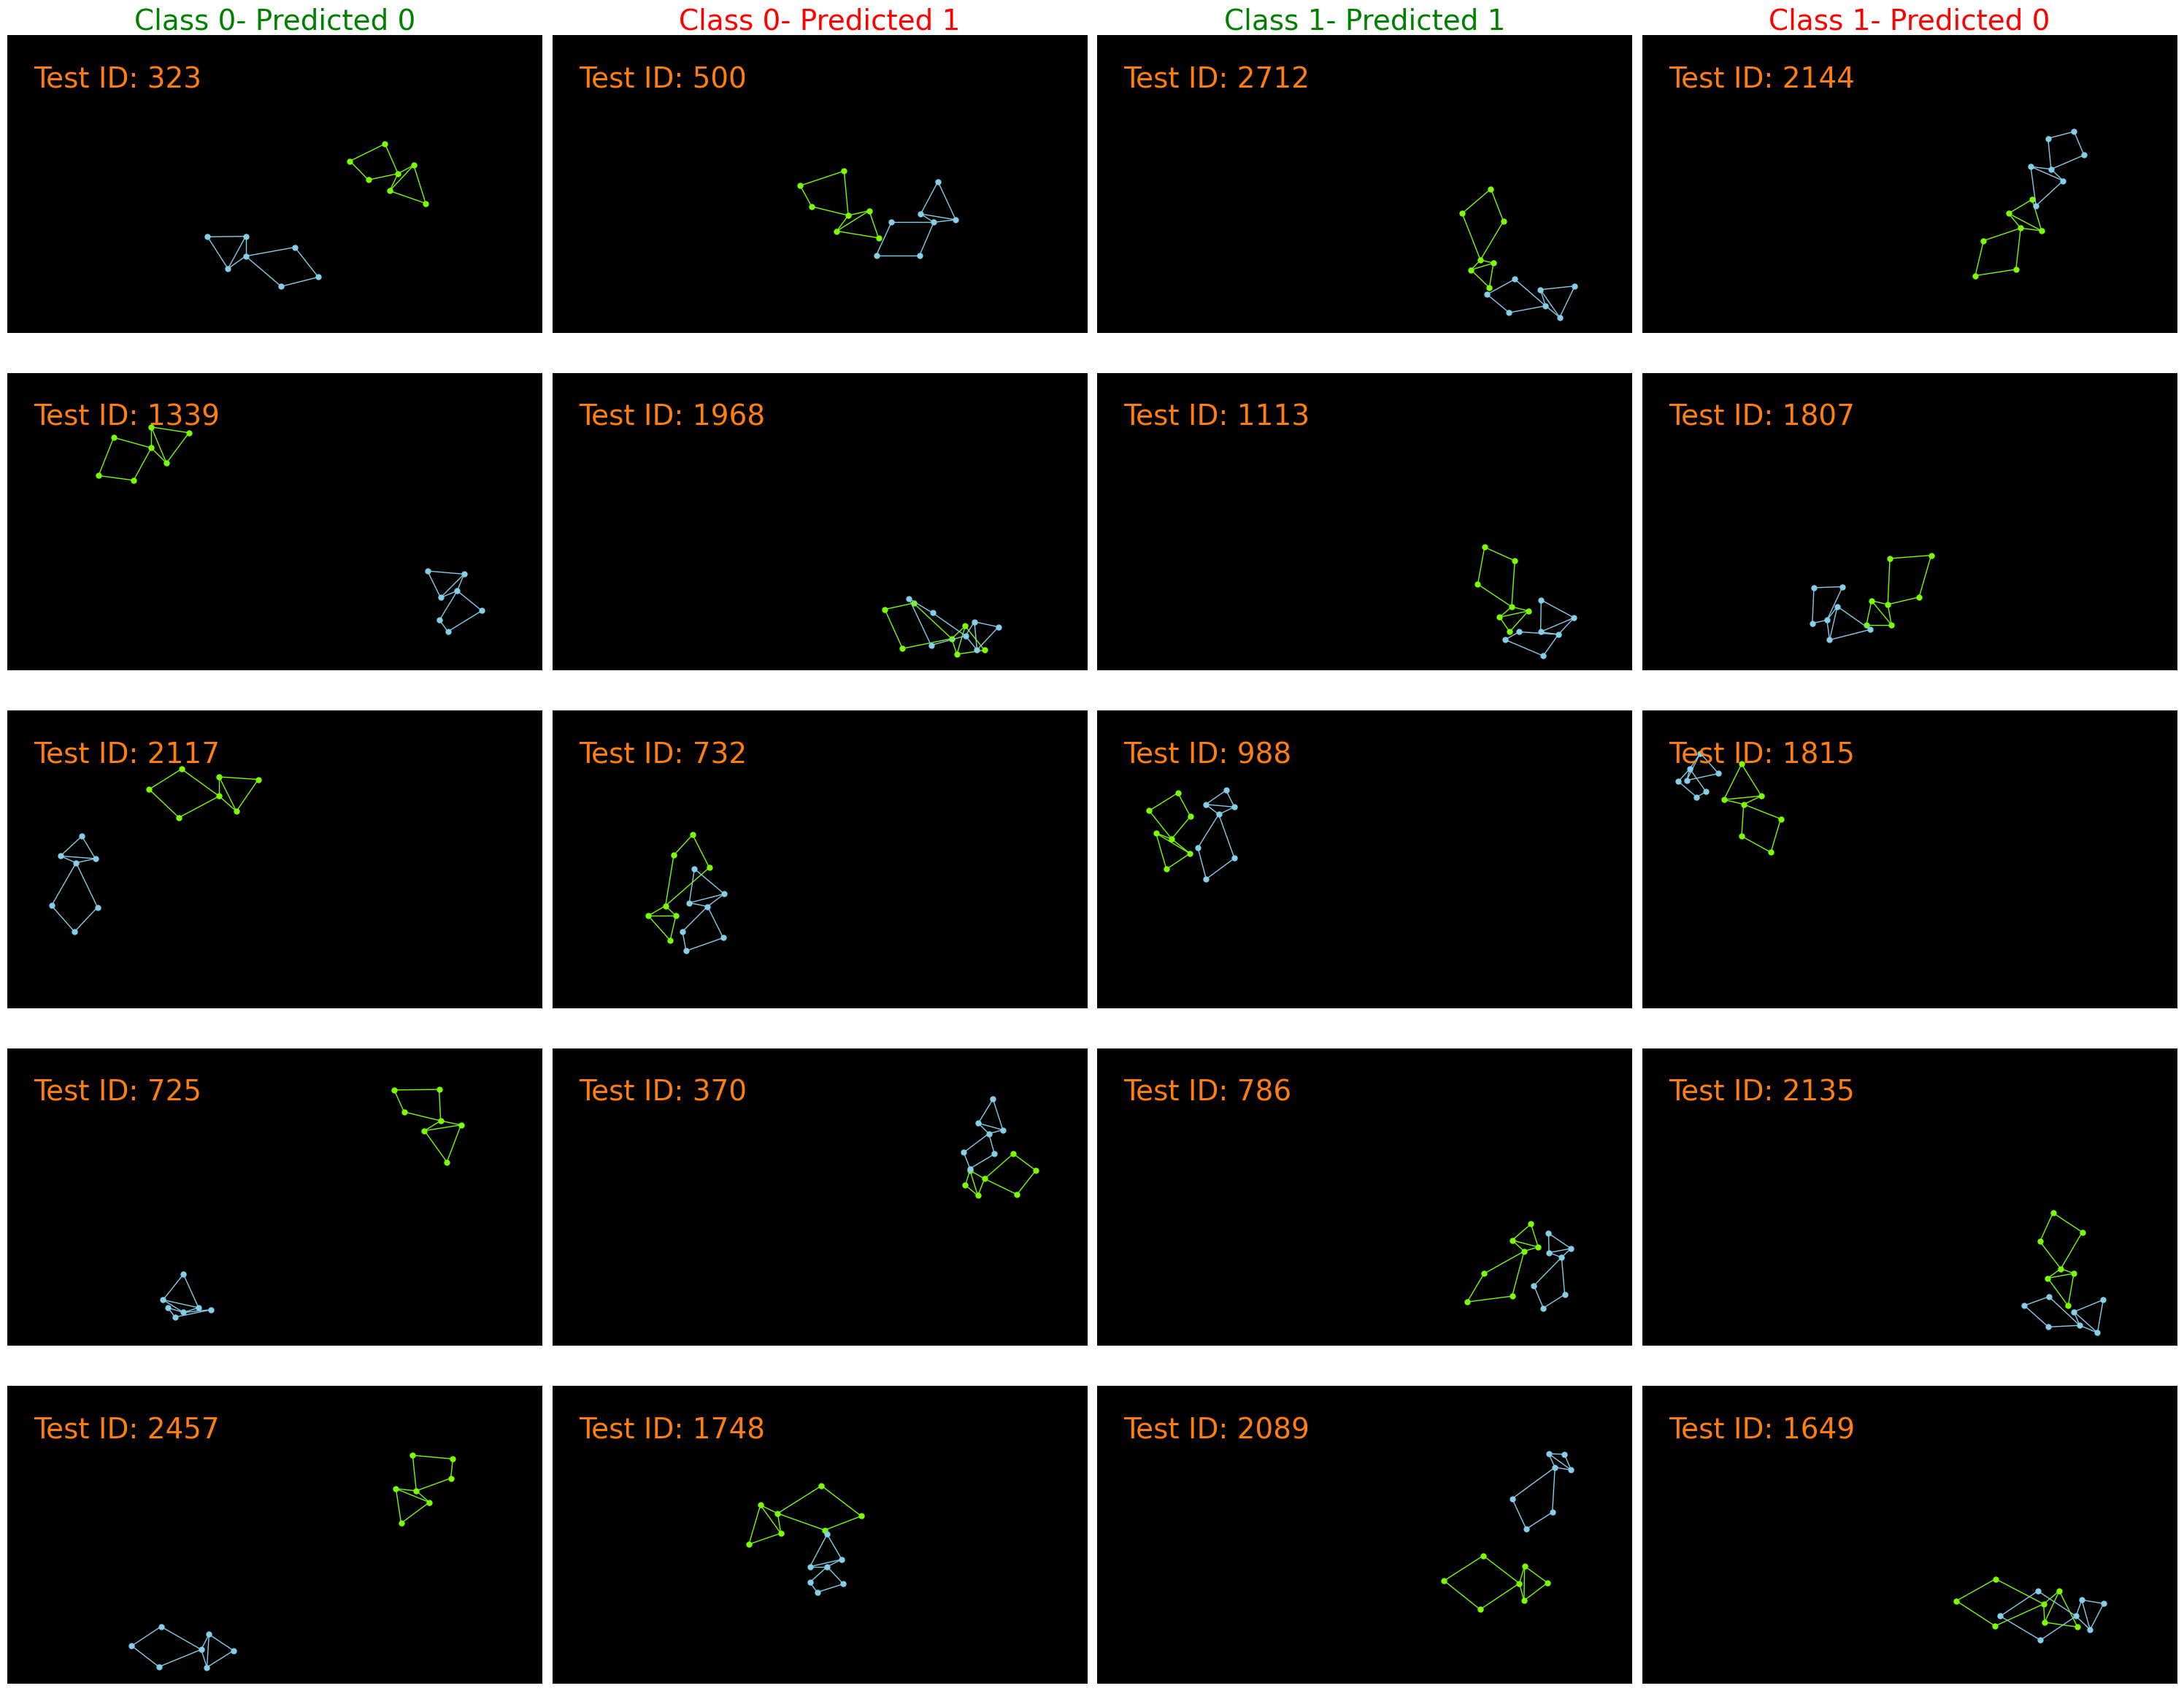

In [18]:
fig = display_samples_by_class(test_trajectory, test_labels, predictions_nn)
plt.show(fig)

In [19]:
from dsl_compiler import ExpertProgram

program = "Window5Avg( Or(AccelerationSelect, OverlapBboxesSelect) )"
config.lr = 1e-2
sample_model = ExpertProgram(program, config=config)

# Use gradient descent to find parameters of multi-variable linear regression.
sample_model = train(sample_model, dm, config=config)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type | Params
------------------------------
------------------------------
0         Trainable params
0         Non-trainable params
0         Total params
0.000     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [20]:
# Evaluate using F1 score.

predictions_nn, _, _, _ = evaluate(sample_model, dm.test_dataloader(), test_labels)

F1 score on test set: 0.3520710059171598
Precision on test set: 0.37658227848101267
Recall on test set: 0.33055555555555555


In [23]:
program = '### Your Program Here ###'
config.lr = 1e-2
expert_model = ExpertProgram(program, config=config)

# Use gradient descent to find parameters of multi-variable linear regression.
custom_model = train(expert_model, dm, config=config)

predictions_nn, _, _, _ = evaluate(custom_model, dm.test_dataloader(), test_labels)

ParseException: ignored

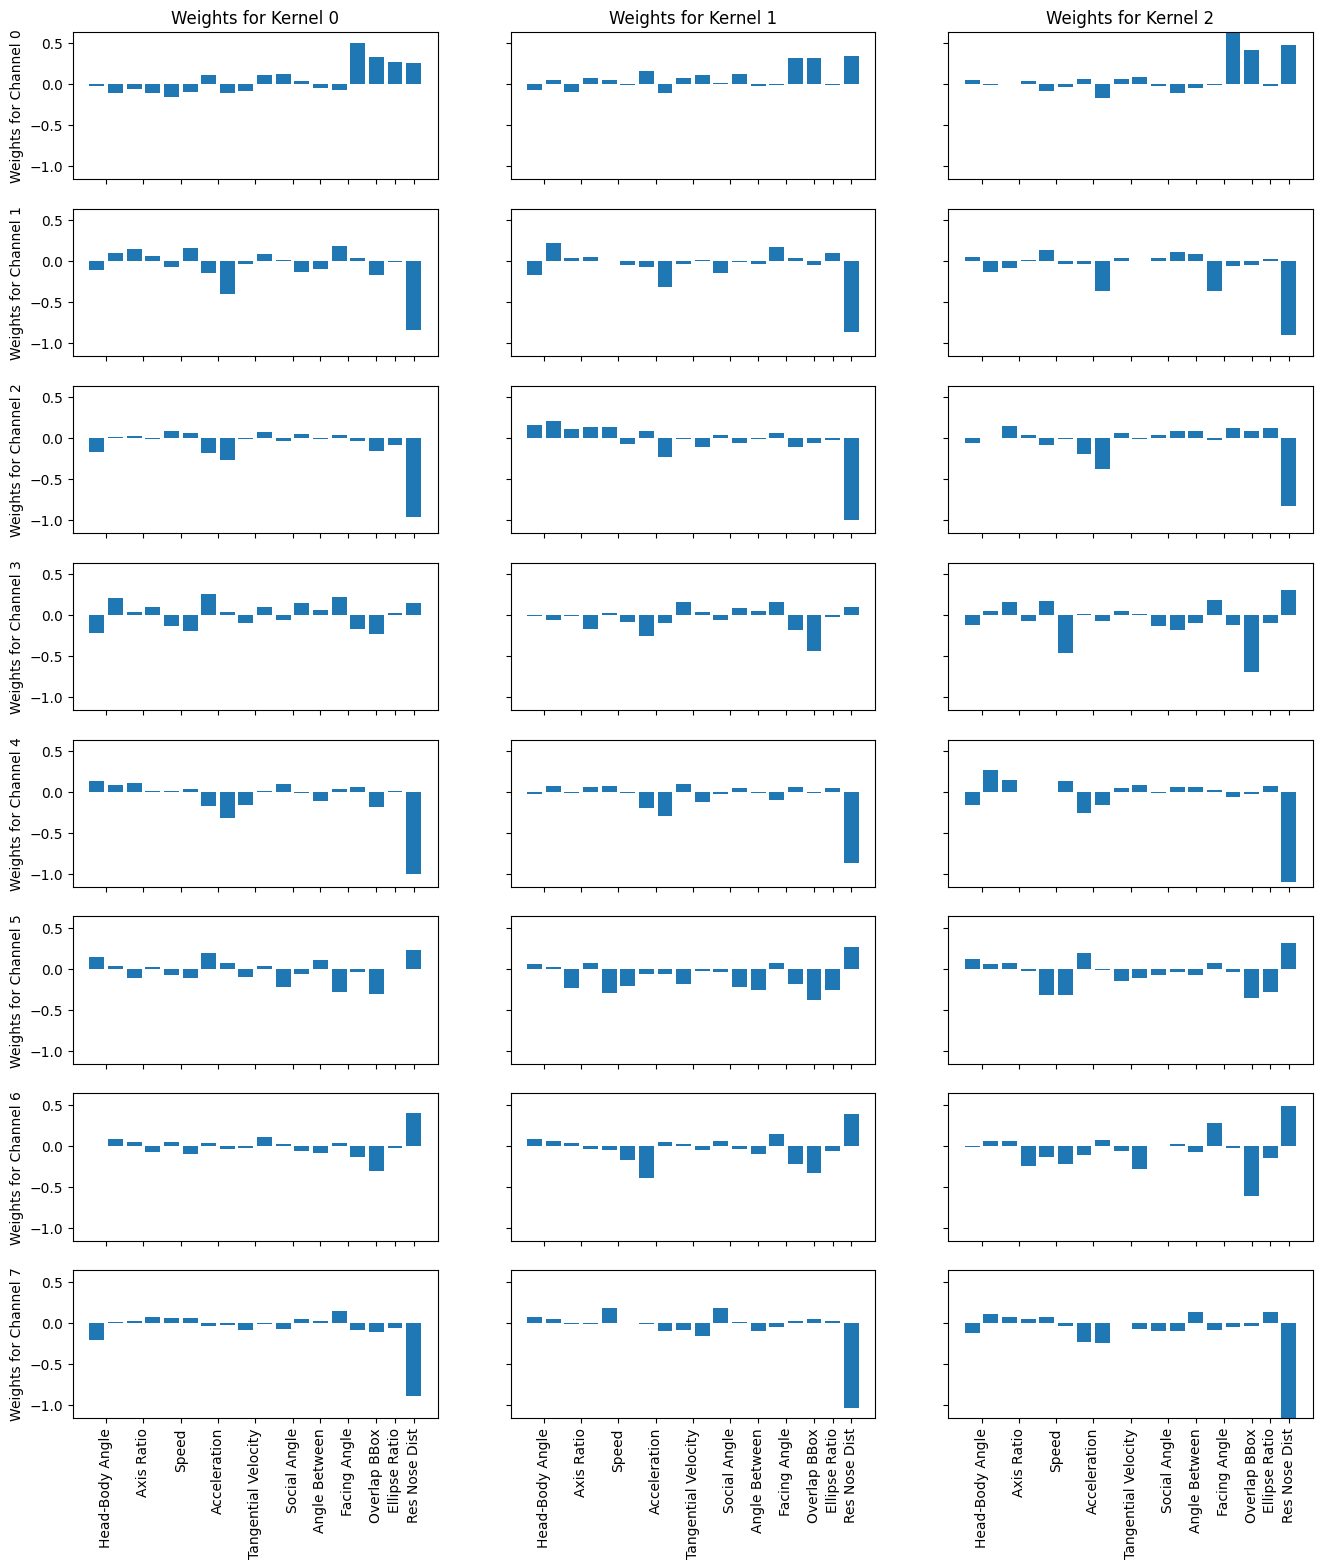

In [24]:
layer_to_plot = 'block1.conv.weight' # We plot one of the conv layers

for name, param in trained_model.model.named_parameters():
  if name == layer_to_plot:
    param = param.detach().numpy()
    num_channels, num_features, num_kernels = param.shape

    max_val = np.max(param)
    min_val = np.min(param)

    fig, axs = plt.subplots(num_channels, num_kernels,
                            figsize = (num_channels*2, num_kernels*6),
                            sharex = True, sharey = True)

    for i in range(num_channels):
      axs[i][0].set_ylabel('Weights for Channel ' + str(i))

      for j in range(num_kernels):
        axs[i][j].bar(range(num_features), param[i, :, j])
        axs[i][j].set_ylim([min_val, max_val])

    for j in range(num_kernels):
      axs[0][j].set_title('Weights for Kernel ' + str(j))
      axs[-1][j].set_xticks([0.5,2.5,4.5,6.5,8.5,10.5,12,13.5,15,16, 17])
      axs[-1][j].set_xticklabels(["Head-Body Angle", "Axis Ratio", "Speed",
                                  "Acceleration", "Tangential Velocity",
                                  "Social Angle", "Angle Between", "Facing Angle",
                                  "Overlap BBox", "Ellipse Ratio", "Res Nose Dist"],
                                 rotation = 90)


In [26]:
# Print program
from near import print_program

print(print_program(sample_model.model, ignore_constants = False))

Window5Avg(Or(AccelerationSelect(params: dict_values([Parameter containing:
tensor([[ 0.0045, -0.0248],
        [-0.3047, -0.3129]], requires_grad=True), Parameter containing:
tensor([ 0.9107, -0.1845], requires_grad=True)])), OverlapBboxesSelect(params: dict_values([Parameter containing:
tensor([[-0.5860],
        [ 0.5211]], requires_grad=True), Parameter containing:
tensor([-0.3401, -0.1746], requires_grad=True)]))))
